# Intro to SKLearn and Clustering
`Ariq Heritsa Maalik (1305213031)`

In this tutorial we will introduce the Sci-Kit Learn library:https://scikit-learn.org/stable/

This is a very important library with a huge toolkit for data processing, unsupervised and supervised learning. It is one of the core tools for data science.

We will see some of the capabilities of this toolkit and focus on clustering.

In [71]:
"""
kode ini ditujukan untuk mengimport beberapa library yang akan digunakan untuk melakukan clustering

numpy digunakan untuk melakukan operasi vektor dan matriks
scipy digunakan untuk komputasi scientific
matplotlib dan seaborn digunakan untuk melakukan visualisasi data
sklearn digunakan untuk pembuatan model machine learning
"""
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

# Computing Distances

## Computing Distance Using SciPy

In [72]:
"""
kode ini bertujuan untuk menghitung jarak antar dua data 
menggunakan beberapa metode seperti cosine, euclidean, jaccard, dan hamming
"""
import scipy.spatial.distance as sp_dist

x = np.random.randint(2, size = 5)
y = np.random.randint(2, size = 5)
print (x)
print (y)
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))
# When computing jaccard similarity of 0/1 matrices, 
# 1 means that the element corresponding to the column is in the set,
# 0 that the element is not in the set

[1 1 1 0 0]
[0 1 0 1 1]
0.6666666666666666
2.0
0.8
0.8


In [73]:
"""
kode ini bertujuan untuk menghitung jarak dari matrix yang sudah dibuat
menggunakan metode squareform
"""
A = np.random.randint(2, size = (5,3))

# computes the matrix of all pairwise distances of rows
# returns a vector with N(N-1)/2 entries (N number of rows)
D = sp_dist.pdist(A, 'jaccard') 
print (A)
print('\n all row distances')
print (D)
print(sp_dist.squareform(D))

[[1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 0]]

 all row distances
[0.66666667 0.66666667 0.         0.66666667 1.         0.66666667
 0.         0.66666667 1.         0.66666667]
[[0.         0.66666667 0.66666667 0.         0.66666667]
 [0.66666667 0.         1.         0.66666667 0.        ]
 [0.66666667 1.         0.         0.66666667 1.        ]
 [0.         0.66666667 0.66666667 0.         0.66666667]
 [0.66666667 0.         1.         0.66666667 0.        ]]


In [74]:
"""
kali ini kita hitung jarak antar dua matrix
menggunakan metode cdist
"""
x = x.reshape(1,5)
y = y.reshape(1,5)
sp_dist.cdist(x,y,'cosine')

array([[0.66666667]])

In [75]:
"""
begitu pula blok kode ini
"""
B = np.random.randint(2, size = (3,3))
print(A)
print(B)
D = sp_dist.cdist(A,B,'jaccard')
print(D)

[[1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0]
 [0 1 0]
 [0 0 1]]
[[1.         0.66666667 0.66666667]
 [1.         0.         1.        ]
 [1.         1.         1.        ]
 [1.         0.66666667 0.66666667]
 [1.         0.         1.        ]]


## Computing Distance Using Sklearn

In [76]:
"""
menghitung jarak antar data dari matrix dengan menggunakan library sklearn
"""
import sklearn.metrics as metrics

#computes the matrix of all pairwise distances of rows
# returns a NxN matrix (N number of rows)
print(A)
D2 = metrics.pairwise_distances(A,metric = 'jaccard') 
print('\n the matrix of row distances')
print(D2)

[[1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 0]]

 the matrix of row distances
[[0.         0.66666667 0.66666667 0.         0.66666667]
 [0.66666667 0.         1.         0.66666667 0.        ]
 [0.66666667 1.         0.         0.66666667 1.        ]
 [0.         0.66666667 0.66666667 0.         0.66666667]
 [0.66666667 0.         1.         0.66666667 0.        ]]


/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [77]:
"""
menghitung jarak menggunakan cosine similarity
"""
C = metrics.pairwise.cosine_similarity(A)
print('Cosine Similarity')
print(C)

Cosine Similarity
[[1.         0.57735027 0.57735027 1.         0.57735027]
 [0.57735027 1.         0.         0.57735027 1.        ]
 [0.57735027 0.         1.         0.57735027 0.        ]
 [1.         0.57735027 0.57735027 1.         0.57735027]
 [0.57735027 1.         0.         0.57735027 1.        ]]


In [78]:
"""
kali ini menggunakan pairwise_distances
"""
print(A)
print (B)

#computes the matrix of all pairwise distances of rows of A with rows of B
# returns an NxM matrix (N rows of A, M rows of B)
D3 = metrics.pairwise_distances(A,B,metric = 'jaccard') 
print('\n the matrix of distances between the rows of A and B')
print(D3)

[[1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0]
 [0 1 0]
 [0 0 1]]

 the matrix of distances between the rows of A and B
[[1.         0.66666667 0.66666667]
 [1.         0.         1.        ]
 [1.         1.         1.        ]
 [1.         0.66666667 0.66666667]
 [1.         0.         1.        ]]


/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [79]:
"""
dapat dihitung juga dari sparse matrix
"""
d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])
s = sp_sparse.csr_matrix((d[:,2],(d[:,0],d[:,1])), shape=(4,6))
D4 = metrics.pairwise.pairwise_distances(s,metric = 'euclidean')
print(s.toarray())
print(D4)

[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]
[[ 0.         38.48376281 35.74912586 38.69108424]
 [38.48376281  0.         26.62705391 19.39071943]
 [35.74912586 26.62705391  0.         26.92582404]
 [38.69108424 19.39071943 26.92582404  0.        ]]


In [80]:
"""
menghitung jarak dari vector
"""
v = np.random.randint(2, size = 6)
v = v.reshape(1,6)
print(v)
metrics.pairwise.pairwise_distances(v,s,metric = 'euclidean')

[[0 0 1 0 1 1]]


array([[35.15679166, 13.07669683, 23.06512519, 13.07669683]])

# Clustering

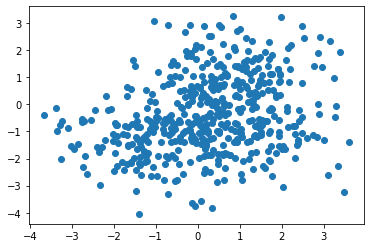

In [81]:
"""
sebelum kita melakukan clustering, kita harus memiliki datanya terlebih dahulu.
kita akan membuat data secara acak dengan menggunakan library sklearn
"""
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,
                                    center_box=(-10.0, 10.0),random_state=0)
plt.scatter(X[:,0], X[:,1])

In [82]:
"""
melihat label cluster dari data yang sudah dibuat
"""
print(type(X))
print(true_labels)
print(len(true_labels[true_labels==0]),len(true_labels[true_labels==1]),len(true_labels[true_labels==2]))

<class 'numpy.ndarray'>
[2 0 1 1 0 1 1 2 2 2 1 0 0 1 1 0 0 2 2 0 0 0 2 2 0 1 0 2 0 2 0 0 0 2 1 1 0
 0 2 2 0 2 1 0 2 2 0 0 1 2 2 0 0 1 0 2 1 1 1 2 2 1 0 0 2 1 1 2 2 2 2 1 2 0
 0 0 2 2 0 0 0 0 0 2 1 2 2 0 0 2 2 1 0 2 1 0 1 2 1 1 2 2 1 2 1 0 1 1 0 2 2
 2 0 2 0 2 2 0 1 1 0 1 2 1 1 2 2 1 2 0 0 0 1 2 2 0 2 0 2 1 2 1 0 0 1 0 2 1
 0 1 2 2 2 0 1 0 1 0 2 2 0 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 2 2 0 2 1 0 2 2 0
 1 2 0 0 2 1 2 2 2 0 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 2 0 0 2 1 1 2 2 0 1 2 0
 0 1 1 1 0 2 2 2 1 2 1 1 1 0 1 2 0 2 1 2 0 2 1 1 2 2 1 2 0 0 1 0 1 0 2 1 2
 1 1 1 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 2 1 2 2 0 0 1 0 2 1 0 2 2 1 0 0 1 0 2
 1 2 1 0 0 0 1 2 0 0 2 2 1 0 0 1 1 0 2 1 0 1 2 1 1 0 2 0 2 1 2 1 0 0 0 1 0
 2 2 1 0 2 2 2 0 1 1 1 0 1 0 0 0 2 0 2 0 2 2 0 2 2 2 2 1 1 1 2 2 2 2 0 0 0
 1 2 0 1 0 1 0 1 2 2 0 2 1 0 1 2 2 0 1 2 1 2 0 0 0 1 2 0 0 1 2 2 0 2 1 0 2
 0 1 0 2 0 0 1 0 0 0 0 1 0 2 2 2 1 0 1 2 1 2 1 0 1 1 1 1 1 0 2 1 2 0 0 1 2
 0 2 1 0 0 1 1 2 1 2 1 1 1 1 2 0 1 1 0 1 2 0 1 1 0 2 0 0 1 1 1 0 1 0 1 1 1
 

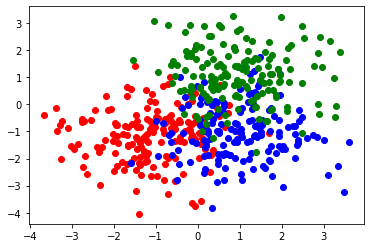

In [83]:
"""
sekarang kita akan melihat bagaimana data tersebut tercluster
"""
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r')
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b')
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')

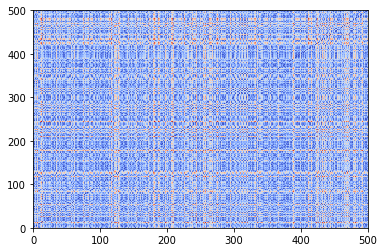

In [84]:
"""
kode berikut ini bertujuan untuk memvisualisasikan jarak dari data yang sudah dibuat
"""
euclidean_dists = metrics.euclidean_distances(X)
plt.pcolormesh(euclidean_dists,cmap=plt.cm.coolwarm)

## Clustering Algorithm

### K-Means

In [85]:
"""
sekarang kita akan membangun model clustering menggunakan algoritma k-means.
setelah itu kita juga akan melihat parameter yang ada pada model tersebut
"""
import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  729.4109184603107

Cluster labels
[0 0 0 2 1 2 2 0 0 0 2 1 1 2 2 1 1 1 2 0 1 1 0 1 1 2 1 2 1 0 0 1 1 0 2 2 1
 1 0 0 1 0 2 1 0 0 1 1 0 0 2 1 1 2 1 1 2 2 1 1 0 2 1 1 1 2 2 2 0 0 1 2 0 1
 0 1 2 0 1 1 1 1 1 0 2 0 1 1 1 0 2 2 1 0 0 0 2 0 1 2 1 0 0 0 2 1 2 2 1 0 0
 0 1 0 0 0 0 1 2 2 1 2 0 2 2 0 0 2 0 1 1 1 2 0 0 1 0 1 0 0 0 2 0 0 2 1 0 0
 1 2 1 0 0 1 2 1 2 0 1 0 1 0 0 1 2 0 2 2 2 0 0 0 2 1 2 1 2 0 1 0 2 1 1 0 1
 2 0 1 1 1 2 0 0 0 1 0 0 2 0 2 1 0 2 0 2 0 1 1 1 2 0 1 1 2 1 2 0 0 1 2 0 1
 1 2 2 1 1 0 1 0 2 0 2 1 2 1 2 1 1 1 2 0 1 0 2 0 0 1 2 0 1 0 2 1 2 1 0 2 0
 2 2 2 0 1 1 1 1 2 2 1 2 0 2 1 1 1 1 0 2 0 0 1 1 2 1 0 2 1 2 0 2 0 1 2 1 1
 2 0 2 1 1 1 2 0 1 1 1 0 2 0 1 2 2 1 0 2 1 2 1 0 2 1 0 1 0 2 1 0 1 1 1 2 1
 1 0 2 0 0 0 0 1 2 2 2 0 1 1 1 1 0 1 2 0 0 2 1 1 0 2 2 2 0 2 1 0 0 0 1 1 1
 0 1 1 2 1 2 0 1 2 0 1 0 2 1 2 0 0 1 2 0 2 0 1 0 1 2 0 1 1 2 0 0 1 0 2 1 0
 0 2 2 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 0 0 2 1 2 2 0 2 2 1 2 2 0 1 1 2 0
 1 0 2 1 0 0 2 0 2 0 2 2 2 

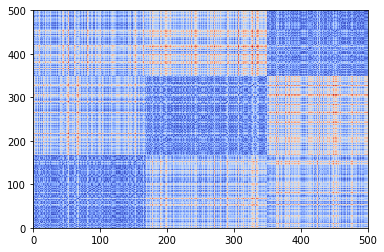

In [86]:
"""
kita akan melihat lagi jarak dari datanya dengan index yang sudah disortir
"""
idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = metrics.euclidean_distances(rX)
#r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolormesh(r_euclid,cmap=plt.cm.coolwarm)

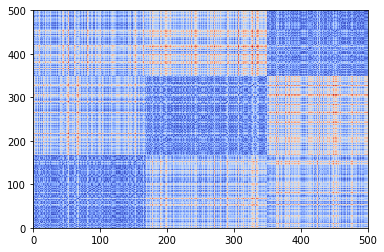

In [87]:
"""
sama seperti sebelumnya
"""
se = euclidean_dists[idx,:]
se = se[:,idx]
plt.pcolormesh(se,cmap=plt.cm.coolwarm)

[[ 26  20 122]
 [140  12  29]
 [  1 135  15]]


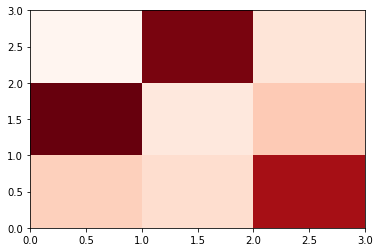

In [88]:
"""
kali ini menggunakan confusion matrix
"""
C= metrics.confusion_matrix(kmeans_labels,true_labels)
print (C)
plt.pcolormesh(C,cmap=plt.cm.Reds)

In [89]:
"""
precision score dan recall score untuk setiap kelas pada data clustering 
menggunakan fungsi dari sklearn.metrics
"""
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print(r)

[0.1547619  0.06629834 0.09933775]
[0.15568862 0.07185629 0.09036145]


[[140  12  29]
 [  1 135  15]
 [ 26  20 122]]


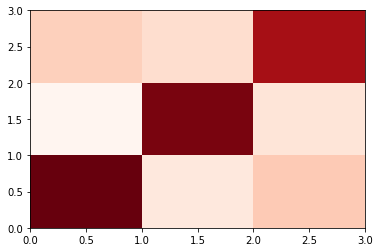

In [90]:
"""
Fungsi ini memetakan label yang dihasilkan oleh algoritma kmeans
ke true_labels dengan menggunakan confusion matrix.
"""

def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

mapped_kmeans_labels,C = cluster_class_mapping(kmeans_labels,true_labels)
print(C)
plt.pcolormesh(C, cmap=plt.cm.Reds)

In [91]:
"""
sekarang kita menghitung precision, recall, dan f1 score untuk setiap kelas
"""
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None)
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = None)
print(f)
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(f)

[0.77348066 0.89403974 0.72619048]
[0.83832335 0.80838323 0.73493976]
[0.8045977  0.8490566  0.73053892]
0.7980470510548809
0.794
0.794859459999974


In [92]:
"""
lalu kita akan menghitung homogeneity, completeness, dan v-measure score
"""
h = metrics.homogeneity_score(true_labels,mapped_kmeans_labels)
print(h)
c = metrics.completeness_score(true_labels,mapped_kmeans_labels)
print(c)
v = metrics.v_measure_score(true_labels,mapped_kmeans_labels)
print(v)

0.44199547480098583
0.4430951461741084
0.44254462735008065


Text(0, 0.5, 'Error')

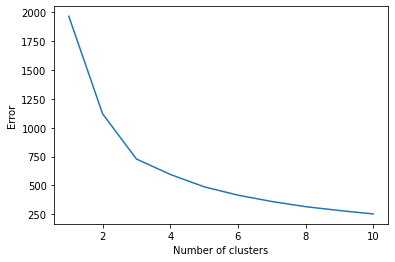

In [93]:
"""
pada bagian ini kita akan menghitung nilai k yang optimal menggunakan elbow method
"""
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Text(0, 0.5, 'silhouette score')

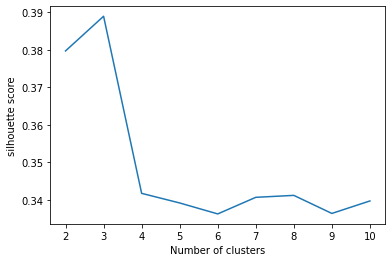

In [94]:
"""
sama seperti sebelumnya, kita akan menghitung nilai k yang optimal menggunakan silhouette score
"""
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

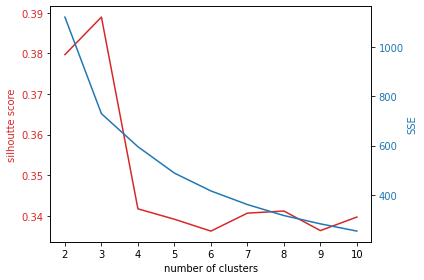

In [95]:
"""
kita akan membandingkan nilai k yang optimal menggunakan silhouette score dan elbow method
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

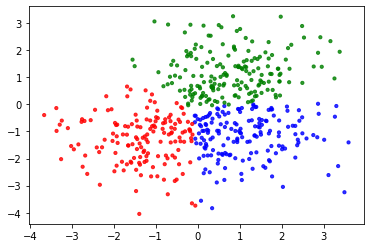

In [96]:
"""
sekarang kita lihat hasil clusteringnya
"""
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8)

### Agglomerative Clustering

[[ 33 156 108]
 [126  10  16]
 [  8   1  42]]
[[126  10  16]
 [ 33 156 108]
 [  8   1  42]]
0.7257145291928573
0.648


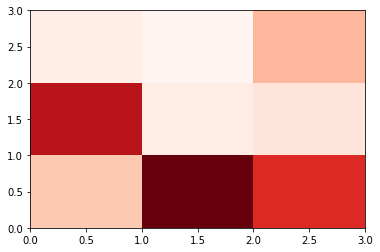

In [97]:
"""
pada blok kode ini, kita membangun model agglomerative clustering
dan memetakannya ke true_labels menggunakan confusion matrix
"""
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X)

C_agglo= metrics.confusion_matrix(agglo_labels,true_labels)
print (C_agglo)
#plt.pcolor(C_agglo,cmap=plt.cm.coolwarm)
plt.pcolormesh(C_agglo,cmap=plt.cm.Reds)

mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels)
print(C_agglo)
p = metrics.precision_score(true_labels,mapped_agglo_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_agglo_labels, average = 'weighted')
print(r)

In [98]:
"""
kita akan membuat hierarchical clustering dengan metode complete linkage dan jarak euclidean pada data X
"""
import scipy.cluster.hierarchy as hr

Z = hr.linkage(X, method='complete', metric='euclidean')

print (Z.shape, X.shape)

(499, 4) (500, 2)


In [99]:
"""
di sini kita akan menghitung jaraknya
"""
import scipy.spatial.distance as sp_dist
D = sp_dist.pdist(X, 'euclidean') 
Z = hr.linkage(D, method='complete')
print (Z.shape, X.shape)

(499, 4) (500, 2)


/var/folders/8l/_qddcffx71x8s26pmmgqthdm0000gq/T/ipykernel_44027/1964647293.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


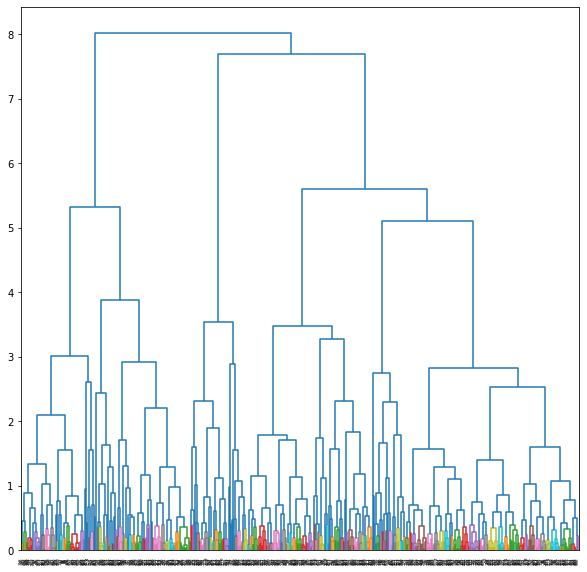

In [100]:
"""
membuat dendrogram
"""
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4)
fig.show()

/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/matrix.py:627: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


[177, 469, 83, 179, 343, 61, 34, 124, 3, 466, 252, 490, 442, 312, 354, 230, 240, 476, 302, 57, 317, 154, 438, 167, 71, 472, 232, 399, 450, 35, 236, 454, 172, 478, 219, 107, 320, 455, 283, 434, 244, 426, 425, 121, 123, 25, 335, 432, 254, 6, 174, 127, 388, 423, 267, 53, 435, 257, 197, 209, 481, 415, 491, 264, 206, 294, 181, 411, 275, 12, 117, 208, 226, 187, 332, 444, 238, 274, 263, 310, 75, 355, 374, 4, 424, 465, 95, 114, 142, 309, 281, 129, 468, 471, 80, 250, 200, 266, 419, 235, 436, 383, 194, 462, 28, 160, 441, 301, 412, 40, 11, 173, 242, 380, 100, 350, 221, 330, 392, 410, 36, 499, 287, 394, 88, 31, 54, 43, 155, 182, 347, 20, 222, 295, 369, 32, 15, 188, 440, 326, 316, 447, 24, 82, 137, 92, 480, 168, 223, 431, 382, 484, 492, 52, 345, 363, 58, 300, 47, 78, 51, 387, 356, 145, 207, 346, 416, 62, 329, 37, 305, 98, 321, 153, 178, 247, 348, 306, 417, 112, 148, 163, 405, 367, 81, 255, 323, 304, 131, 313, 135, 218, 402, 120, 16, 482, 63, 205, 333, 474, 443, 231, 1, 403, 150, 108, 397, 45, 19, 3

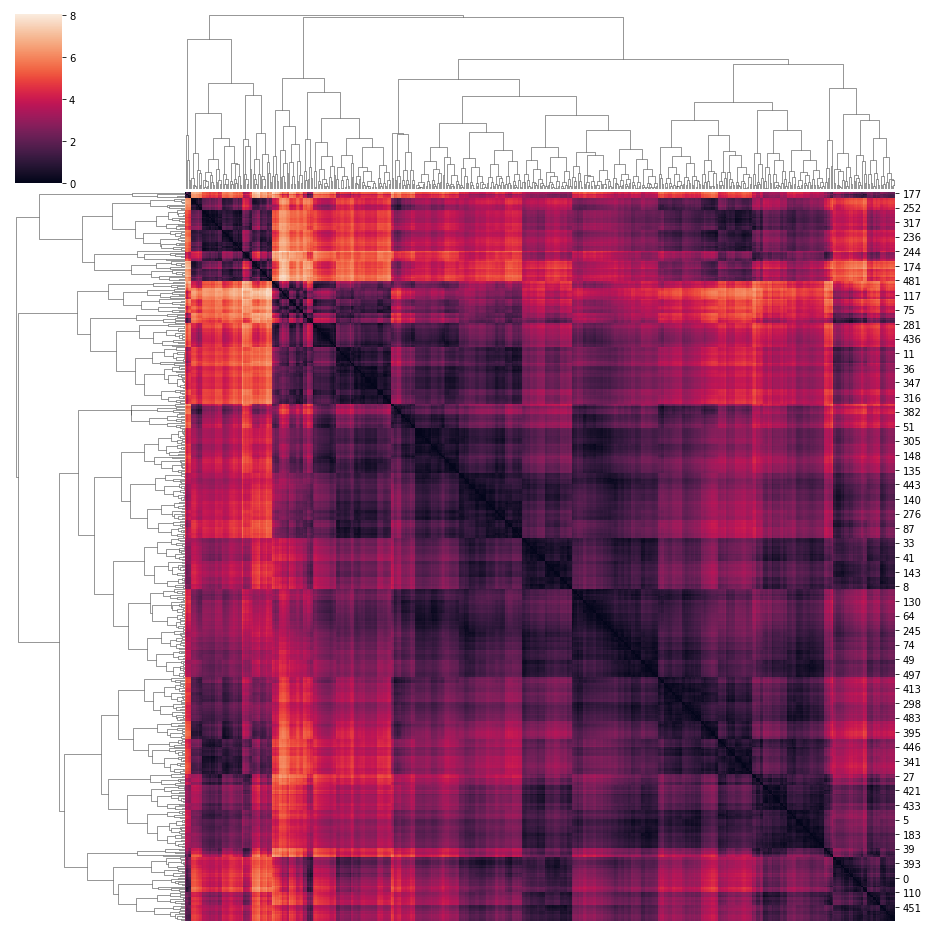

In [101]:
"""
kita akan melihat performa clusteringnya
"""
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print (cg.dendrogram_col.reordered_ind)

### DBSCAN

In [102]:
"""
kita akan membangun model dbscan dan melihat true_labels nya
"""
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)
print(dbscan_labels) #label -1 corresponds to noise
renamed_dbscan_labels = [x+1 for x in dbscan_labels]
C = metrics.confusion_matrix(renamed_dbscan_labels,true_labels)
#print(C)
print (C[:,:max(true_labels)+1])

[ 5  0  0 -1 -1  0 -1  0  0  3  0  0 -1 -1  0 -1  0  0  0  0  0  0  5  0
  0 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0 -1  1 -1  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1  0  0 -1  0  2  0  0 -1  0  3  0  0  0 -1  0  0 -1  0  0 -1
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0
  0 -1  0 -1 -1  3  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  4  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0 -1  1  0  0  0 -1
 -1  3  0 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0
  0  0  0  0  0 -1  0  0  2  0  0 -1  0  0 -1  0 -1 -1 -1  0  0  0  0 -1
  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  2  0  0 -1  0
  0  5  0  0 -1  0  0  0  0  0  2  0 -1  0 -1  0 -1 -1  0  0  0  0  0 -1
 -1  0  2 -1  0  0  0  5  0  0 -1 -1  0  0  0  0 -1 -1  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1  0  0  0  0  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0

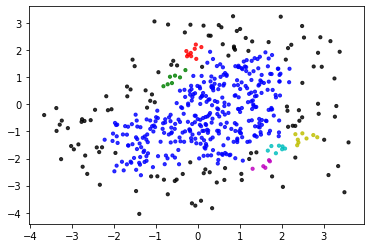

In [103]:
"""
hasil clustering dbscan terlihat seperti ini
"""
#colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = np.hstack([colors] * 20)
colors = np.array([x for x in 'bgrcmywk'*10])
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8)

### Clustering Text Data

In [104]:
"""
kita akan membangun model dari data berupa teks
"""
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (news_data.target)
print (len(news_data.target))

[2 0 0 ... 2 1 2]
1781


In [105]:
"""
parameter dari data teks yang kita miliki
"""
print (type(news_data))
print (news_data.filenames)
print (news_data.target[:10])
print (news_data.data[1])
print (len(news_data.data))

<class 'sklearn.utils._bunch.Bunch'>
['/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60940'
 '/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9955'
 '/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9846'
 ...
 '/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60891'
 '/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/104484'
 '/Users/heritsam/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61110']
[2 0 0 2 0 0 1 2 2 1]
Recently the following problem has arrisen.  The first time I turn on my  
computer when windows starts (from my autoexec) after the win31 title screen  
the computer reboots on its own.  Usually the second time (after reboot) or  
from the DOS prompt everything works fine.

 s far as I remember I have not changed my config.sys or autoxec.bat or  
win.ini.  I can't remember whether this

In [106]:
"""
kita akan melakukan ekstraksi fitur pada dokumen menggunakan skema tf-idf dengan 
menghilangkan kata yang terdapat dalam stop word bahasa Inggris
"""
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))

<class 'scipy.sparse._csr.csr_matrix'>


In [107]:
"""
mencoba melihat hasil prediksi dari data teks
"""
import sklearn.cluster as sk_cluster
k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([2, 0, 0, ..., 1, 2, 1], dtype=int32)

In [108]:
"""
melihat kata yang paling sering muncul pada tiap cluster
"""
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 windows
 file
 dos
 files
 drivers
 thanks
 card
 driver
 use
 problem
Cluster 1:
 space
 nasa
 launch
 moon
 like
 earth
 lunar
 orbit
 shuttle
 people
Cluster 2:
 year
 just
 think
 like
 don
 team
 good
 game
 know
 baseball


In [109]:
"""
sekarang kita akan melihat hasil performa dari clusteringnya menggunakan
algoritma k-means, dbscan, dan agglomerative clustering
"""
C = metrics.confusion_matrix(kmeans.labels_,news_data.target)

mapped_kmeans_labels,C = cluster_class_mapping(kmeans.labels_,news_data.target)
print (C)
p = metrics.precision_score(news_data.target,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(news_data.target,mapped_kmeans_labels, average = None)
print(r)

[[372   0   1]
 [213 597 340]
 [  6   0 252]]
[0.99731903 0.51913043 0.97674419]
[0.62944162 1.         0.42495784]


In [113]:
"""
Kode tersebut melakukan pengelompokan data menggunakan algoritma agglomerative clustering dengan tiga klaster
dan kemudian menghitung matriks confusion antara label prediksi dengan label asli dari data.
"""
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3,)
dense = np.asarray(data.todense())
agglo_labels = agglo.fit_predict(dense) # agglomerative needs dense data

C_agglo= metrics.confusion_matrix(agglo_labels,news_data.target)
print (C_agglo)

[[574 595 482]
 [ 17   0   2]
 [  0   2 109]]


In [114]:
"""
Kode tersebut melakukan clustering dengan menggunakan 
DBSCAN pada data news_data, dan mencetak confusion matrix C.
"""
dbscan = sk_cluster.DBSCAN(eps=0.1)
dbscan_labels = dbscan.fit_predict(data)
C = metrics.confusion_matrix(dbscan.labels_,news_data.target)
print (C)

[[  0 556 567 576]
 [  0   9   0   0]
 [  0  26  30  17]
 [  0   0   0   0]]
